In [1]:
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from matplotlib import colormaps

nfl_data_to_load = Path('Resources/nfl_salary_by_pos_group.csv')

nfl_data = pd.read_csv(nfl_data_to_load)

#nfl_data.head()
cols = nfl_data.columns
cols

Index(['Team_Season', 'Team', 'QB', 'RB', 'WR', 'TE', 'OL', 'Offense', 'IDL',
       'EDGE', 'LB', 'S', 'CB', 'Defense', 'Season', 'W_PCT', 'Playoffs', 'SB',
       'Cap', 'QB_P', 'RB_P', 'WR_P', 'TE_P', 'OL_P', 'IDL_P', 'EDGE_P',
       'LB_P', 'S_P', 'CB_P', 'Defense_P', 'Offense_P', 'Dead_Open_Specials',
       'W'],
      dtype='object')

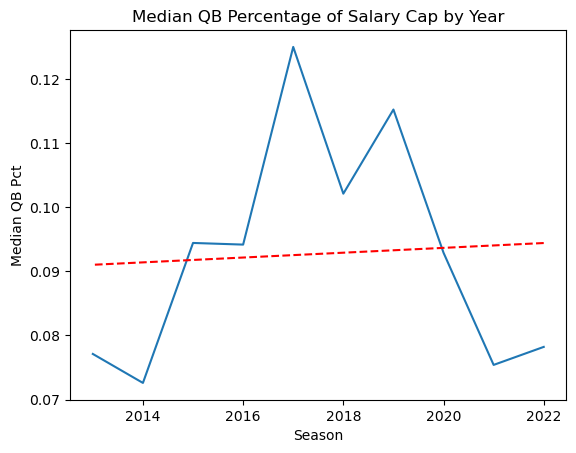

In [2]:
#Find median percentage of the salary cap paid to the QB to determine the cutoff
#for considering a QB as highly compensated
x_axis = nfl_data['Season'].unique()
y_axis = nfl_data.groupby('Season')['QB_P'].median()

z = np.polyfit(x_axis, y_axis, 1)  # Fit a 1st-degree polynomial (i.e., a line)
p = np.poly1d(z)

plt.xlabel('Season')
plt.ylabel('Median QB Pct')
plt.title('Median QB Percentage of Salary Cap by Year')
plt.plot(x_axis, y_axis)
plt.plot(x_axis, p(x_axis), 'r--')
plt.show()

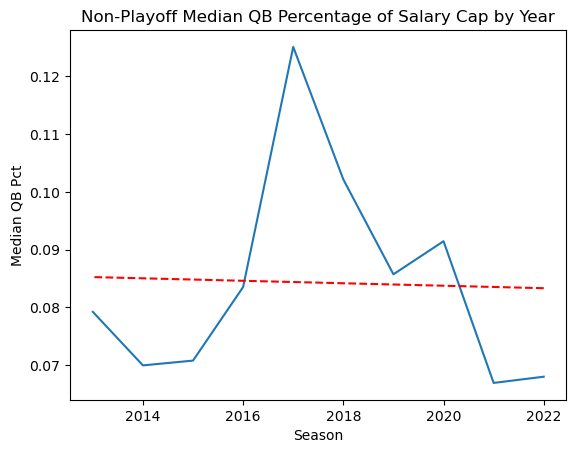

In [3]:
#Find non-playoff teams median percentage of the salary cap paid to the QB to determine the cutoff
#for considering a QB as highly compensated
nonplayoff_teams = nfl_data.query('Playoffs == 0')

x_axis = nfl_data['Season'].unique()
y_axis = nonplayoff_teams.groupby('Season')['QB_P'].median()

z = np.polyfit(x_axis, y_axis, 1)  # Fit a 1st-degree polynomial (i.e., a line)
p = np.poly1d(z)

plt.xlabel('Season')
plt.ylabel('Median QB Pct')
plt.title('Non-Playoff Median QB Percentage of Salary Cap by Year')
plt.plot(x_axis, y_axis)
plt.plot(x_axis, p(x_axis), 'r--')
plt.show()

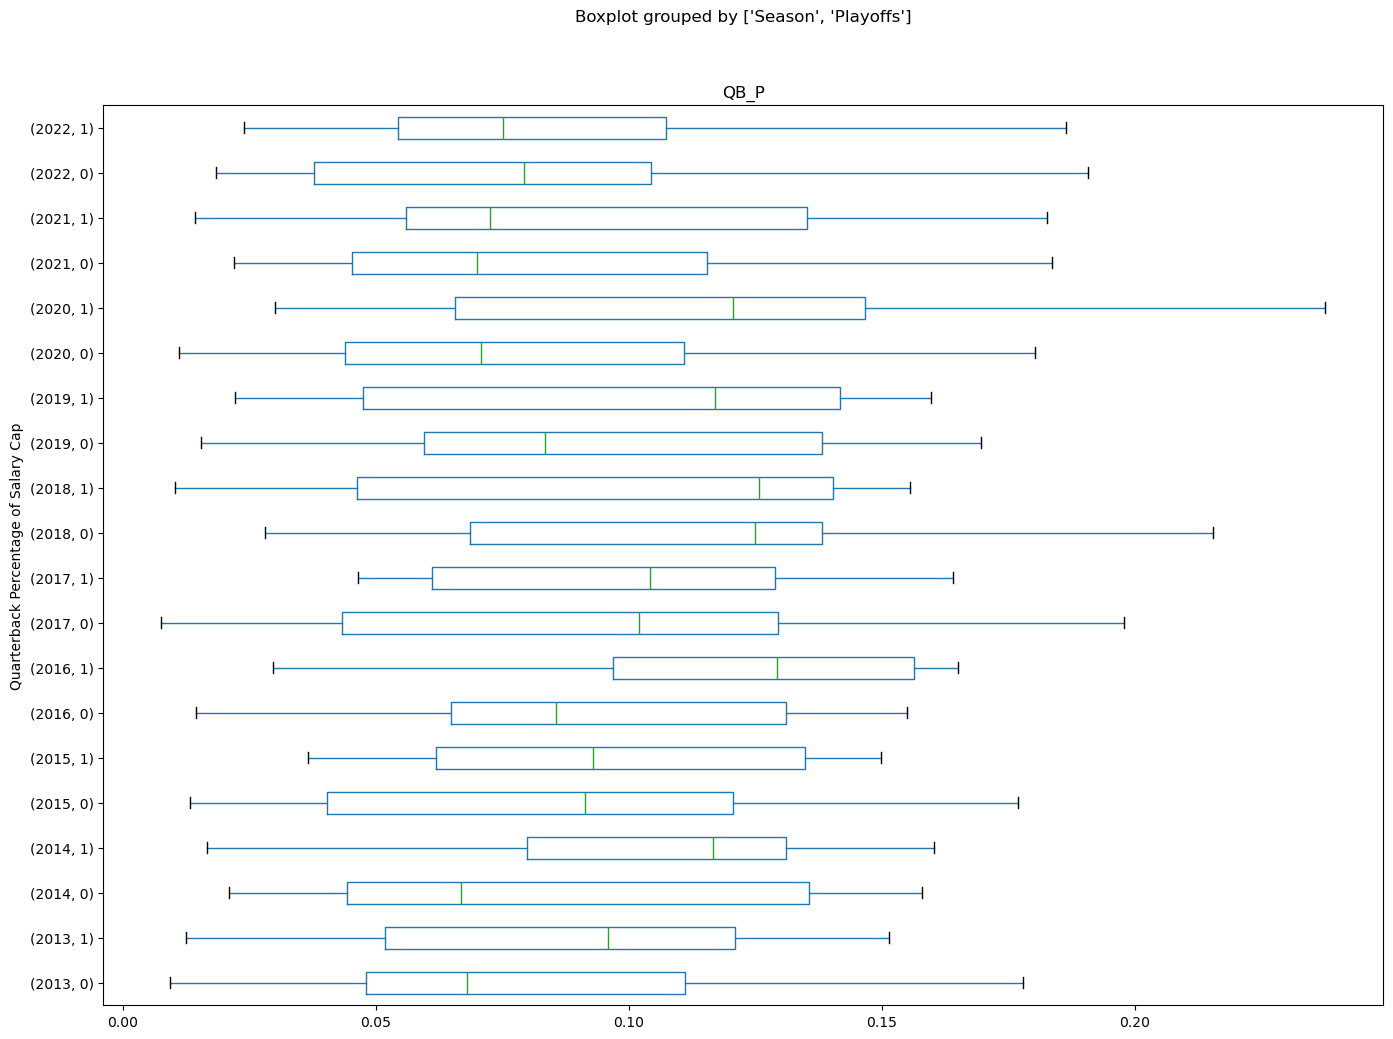

In [4]:
nfl_data.boxplot(column=['QB_P'], by=['Season', 'Playoffs'], grid=False, vert=False, figsize=(16, 12))

plt.ylabel('Quarterback Percentage of Salary Cap')
plt.show()

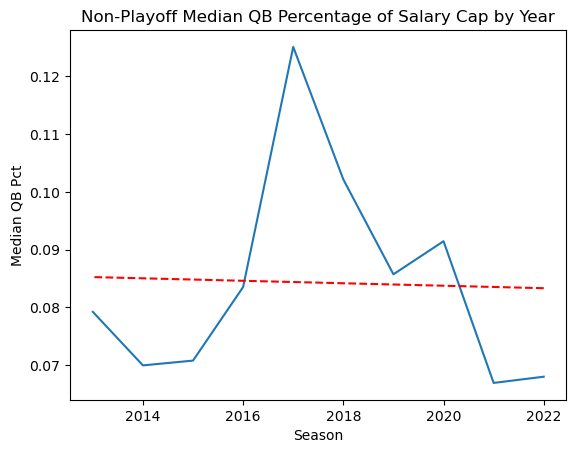

In [5]:
#Find non-playoff teams median percentage of the salary cap paid to the QB to determine the cutoff
#for considering a QB as highly compensated
nonplayoff_teams = nfl_data.query('Playoffs == 0')

x_axis = nfl_data['Season'].unique()
y_axis = nonplayoff_teams.groupby('Season')['QB_P'].median()

z = np.polyfit(x_axis, y_axis, 1)  # Fit a 1st-degree polynomial (i.e., a line)
p = np.poly1d(z)

plt.xlabel('Season')
plt.ylabel('Median QB Pct')
plt.title('Non-Playoff Median QB Percentage of Salary Cap by Year')
plt.plot(x_axis, y_axis)
plt.plot(x_axis, p(x_axis), 'r--')
plt.show()

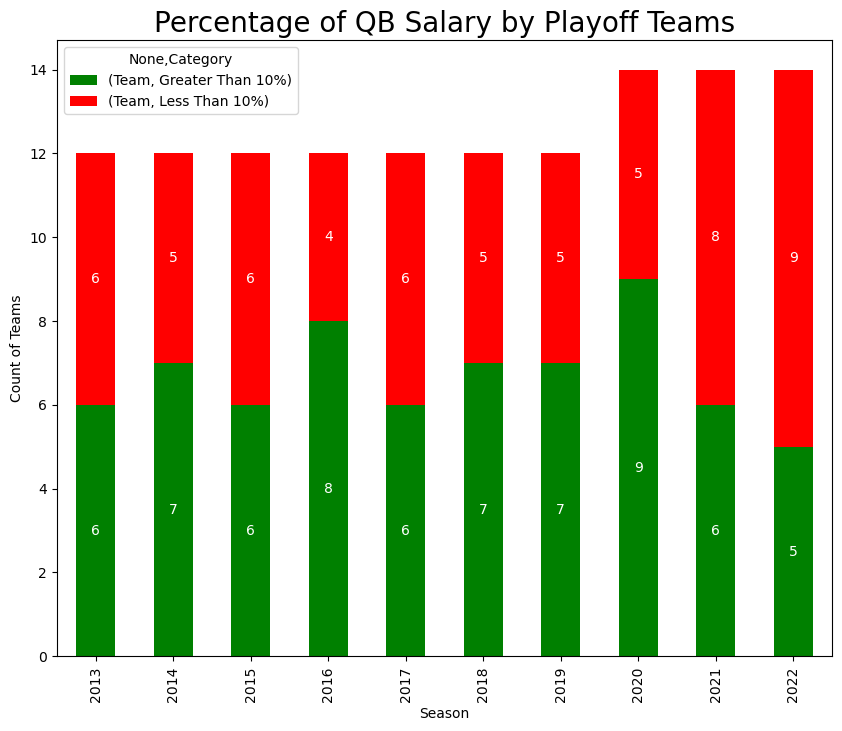

In [6]:
#STACKED BAR CHART
winning_qb_pcts = nfl_data[['Season', 'Team', 'QB_P', 'Playoffs']]
winning_qb_pcts = winning_qb_pcts[winning_qb_pcts['Playoffs'] == 1]
lessthan10_pcts = winning_qb_pcts[winning_qb_pcts['QB_P'] < 0.1]
lessthan10_pcts.insert(3, 'Category', 'Less Than 10%')
#lessthan10_pcts

greaterthan10_pcts = winning_qb_pcts[winning_qb_pcts.QB_P >= 0.1]
greaterthan10_pcts.insert(3, 'Category', 'Greater Than 10%')
greaterthan10_pcts
#greaterthan10_pcts

frames = [lessthan10_pcts, greaterthan10_pcts]
qb_sals_by_year = pd.concat(frames)
#qb_sals_by_year

teams_by_cat = qb_sals_by_year[['Season', 'Team', 'Category']]
#teams_by_cat

pivot = pd.pivot_table(data=teams_by_cat, index=['Season'], columns=['Category'], aggfunc='count')
#pivot

ax = pivot.plot.bar(stacked=True, color =['green', 'red'], figsize=(10,8))
ax.set_title('Percentage of QB Salary by Playoff Teams', fontsize=20)
ax.set_ylabel('Count of Teams')
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')


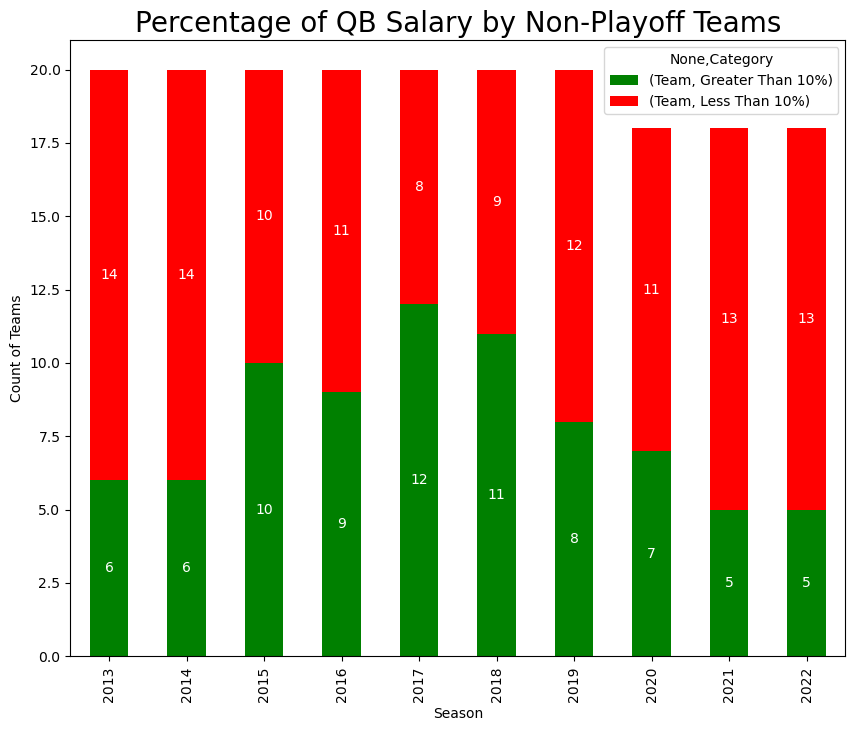

In [7]:
#STACKED BAR CHART
winning_qb_pcts = nfl_data[['Season', 'Team', 'QB_P', 'Playoffs']]
winning_qb_pcts = winning_qb_pcts[winning_qb_pcts['Playoffs'] == 0]
lessthan10_pcts = winning_qb_pcts[winning_qb_pcts['QB_P'] < 0.1]
lessthan10_pcts.insert(3, 'Category', 'Less Than 10%')
#lessthan10_pcts

greaterthan10_pcts = winning_qb_pcts[winning_qb_pcts.QB_P >= 0.1]
greaterthan10_pcts.insert(3, 'Category', 'Greater Than 10%')
greaterthan10_pcts
#greaterthan10_pcts

frames = [lessthan10_pcts, greaterthan10_pcts]
qb_sals_by_year = pd.concat(frames)
#qb_sals_by_year

teams_by_cat = qb_sals_by_year[['Season', 'Team', 'Category']]
#teams_by_cat

pivot = pd.pivot_table(data=teams_by_cat, index=['Season'], columns=['Category'], aggfunc='count')
#pivot

ax = pivot.plot.bar(stacked=True, color =['green', 'red'], figsize=(10,8))
ax.set_title('Percentage of QB Salary by Non-Playoff Teams', fontsize=20)
ax.set_ylabel('Count of Teams')
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')


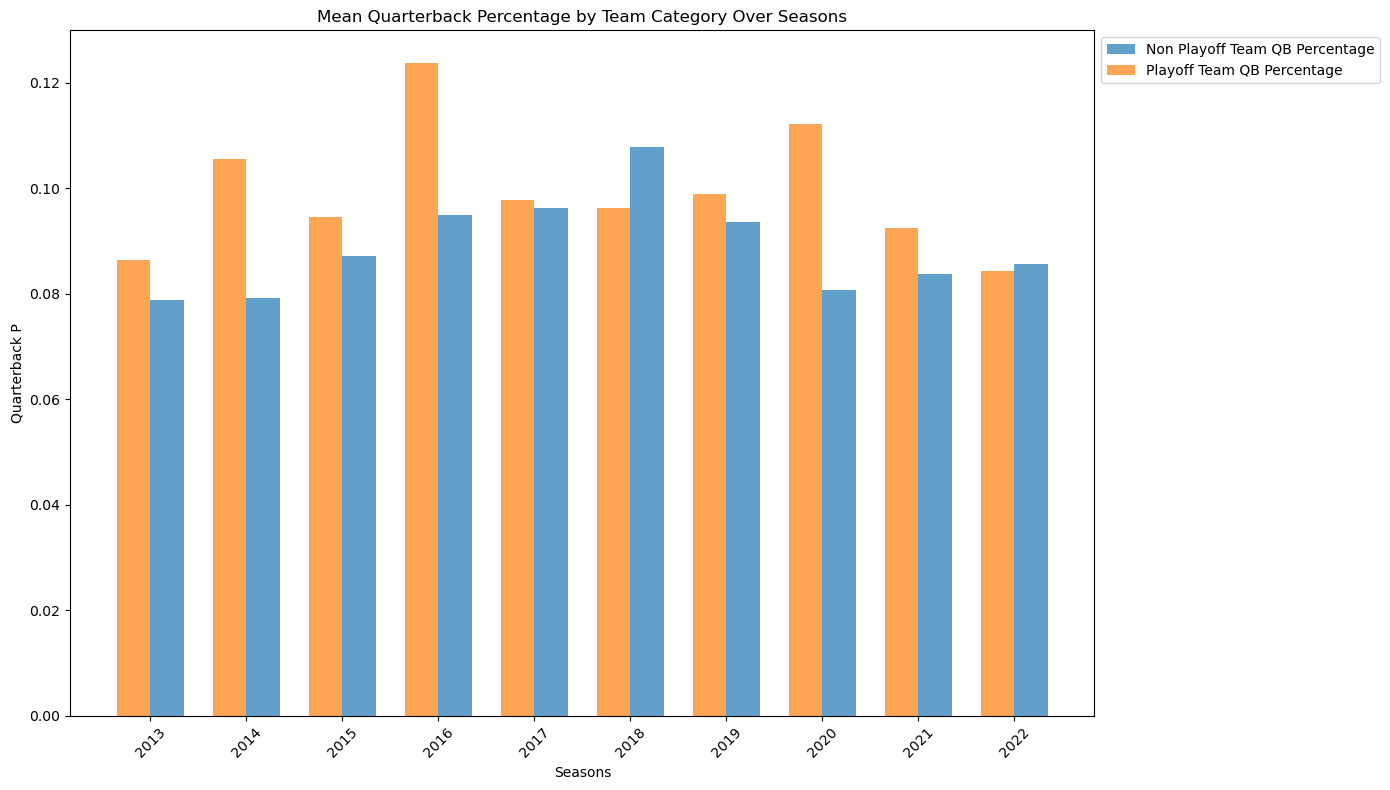

In [11]:
# Mean bar charts
df = nfl_data
df.loc[df['Playoffs'] == 1, 'Category'] = "Playoff Team"
df.loc[df['Playoffs'] == 0, 'Category'] = "Non Playoff Team"
agg_data = df.groupby(['Season', 'Category'])['QB_P'].mean().reset_index()
def create_bar_chart(agg_data, title):
    plt.figure(figsize=(14, 8))
    plt.title(title)
    seasons = agg_data['Season'].unique()
    categories = agg_data['Category'].unique()
    bar_width = 0.35
    r1 = range(len(seasons))
    r2 = [x + bar_width for x in r1]
    for i, C in enumerate(categories):
        team_data = agg_data[agg_data['Category'] == C]
        plt.bar(r1 if C == "Playoff Team" else r2, team_data['QB_P'], width=bar_width, alpha=0.7, label=f'{C} QB Percentage')
    plt.xlabel('Seasons')
    plt.ylabel('Quarterback P')
    plt.xticks([r + bar_width / 2 for r in range(len(seasons))], seasons, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
# Create bar chart for all teams
create_bar_chart(agg_data, 'Mean Quarterback Percentage by Team Category Over Seasons')

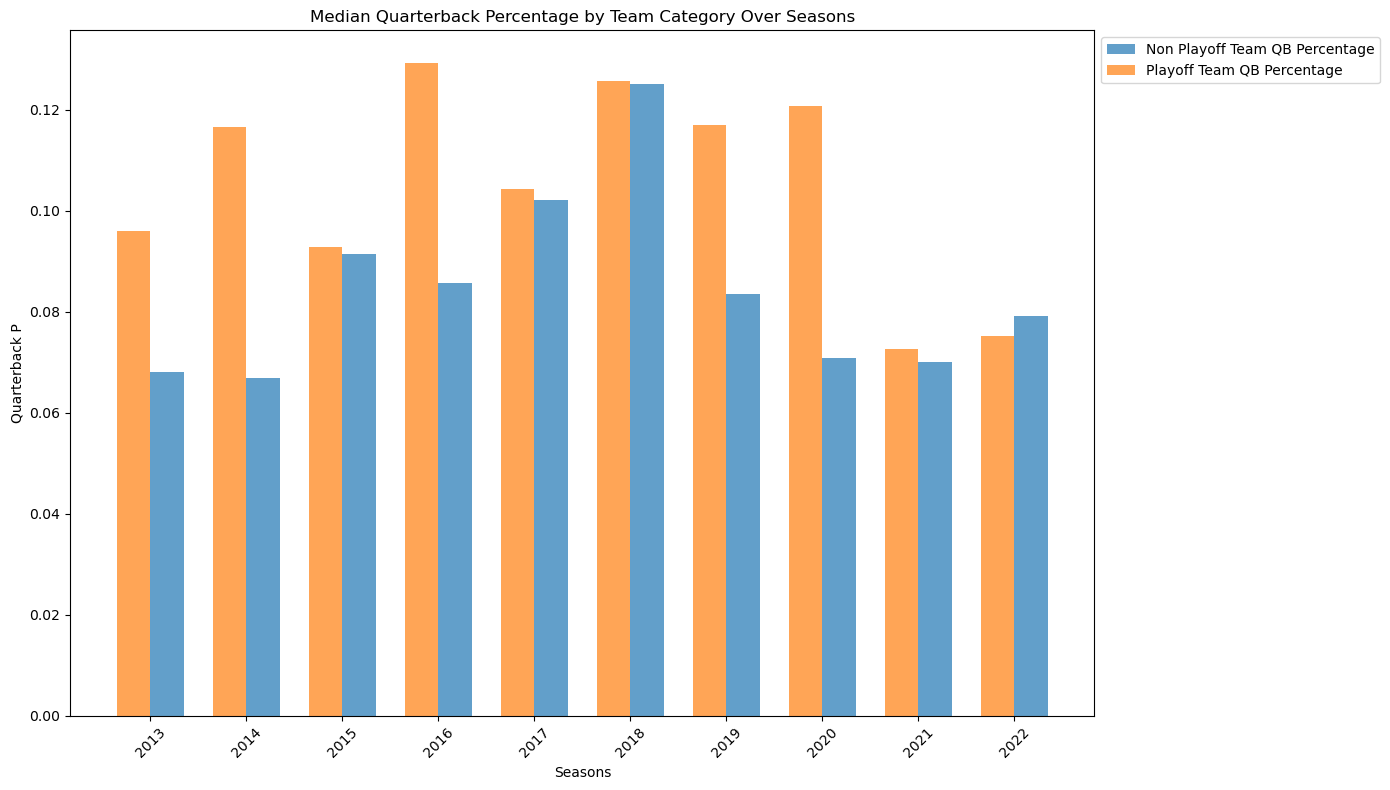

In [12]:
#Median bar charts
df = nfl_data
df.loc[df['Playoffs'] == 1, 'Category'] = "Playoff Team"
df.loc[df['Playoffs'] == 0, 'Category'] = "Non Playoff Team"

agg_data = df.groupby(['Season', 'Category'])['QB_P'].median().reset_index()

def create_bar_chart(agg_data, title):
    plt.figure(figsize=(14, 8))
    plt.title(title)
    seasons = agg_data['Season'].unique()
    categories = agg_data['Category'].unique()
    bar_width = 0.35
    r1 = range(len(seasons))
    r2 = [x + bar_width for x in r1]
    for i, C in enumerate(categories):
        team_data = agg_data.loc[agg_data['Category'] == C]
        plt.bar(r1 if C == "Playoff Team" else r2, team_data['QB_P'], width=bar_width, alpha=0.7, label=f'{C} QB Percentage')
    plt.xlabel('Seasons')
    plt.ylabel('Quarterback P')
    plt.xticks([r + bar_width / 2 for r in range(len(seasons))], seasons, rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
# Create bar chart for all teams
create_bar_chart(agg_data, 'Median Quarterback Percentage by Team Category Over Seasons')

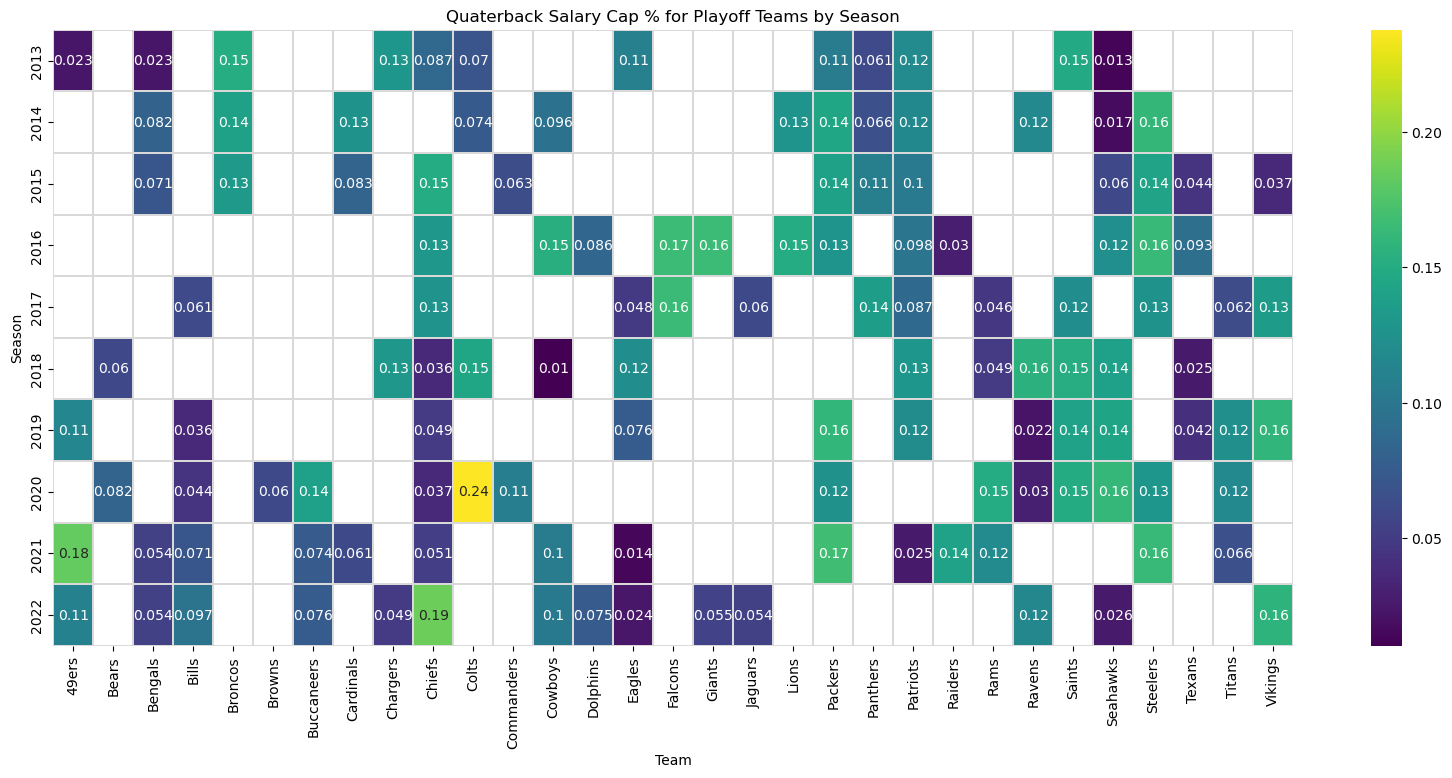

In [15]:
import seaborn as sns

playoff_teams = df.loc[df['Playoffs'] == 1]
data = playoff_teams
pivot_data = data.pivot(index='Season', columns='Team', values='QB_P')
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_data, annot=True, linewidths=0.1, linecolor='#D9D9D9', cmap='viridis')
plt.title('Quaterback Salary Cap % for Playoff Teams by Season')
plt.show()

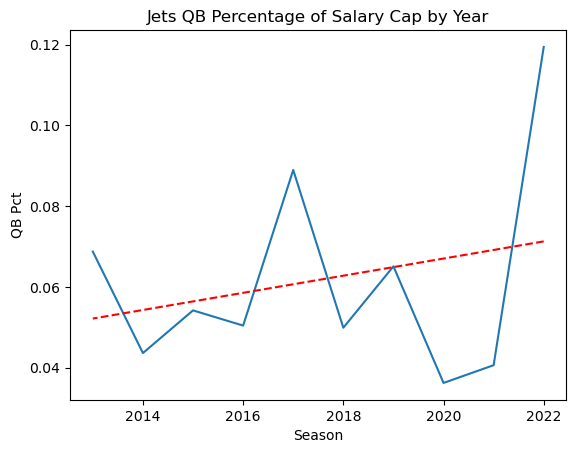

In [16]:
#It's the Jets
jets = df.loc[df['Team'] == 'Jets']
jets

x_axis = jets['Season'].unique()
y_axis = jets.groupby('Season')['QB_P'].median()

z = np.polyfit(x_axis, y_axis, 1)  # Fit a 1st-degree polynomial (i.e., a line)
p = np.poly1d(z)

plt.xlabel('Season')
plt.ylabel('QB Pct')
plt.title('Jets QB Percentage of Salary Cap by Year')
plt.plot(x_axis, y_axis)
plt.plot(x_axis, p(x_axis), 'r--')
plt.show()